In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import seaborn as sns
import os
import matplotlib.pyplot as plt



# set params
plt.rcParams['lines.linewidth'] = 2          # Set default line width
plt.rcParams['xtick.labelsize'] = 16         # Set default tick label size for x-axis
plt.rcParams['ytick.labelsize'] = 16         # Set default tick label size for y-axis
plt.rcParams['xtick.major.size'] = 4         # Set default tick size for x-axis
plt.rcParams['ytick.major.size'] = 4         # Set default tick size for y-axis
plt.rcParams['xtick.major.width'] = 4        # Set default tick width for x-axis
plt.rcParams['ytick.major.width'] = 4        # Set default tick width for y-axis
plt.rcParams['axes.labelsize'] = 16          # Set default axis label size
plt.rcParams['axes.titlesize'] = 18          # Set default title size
plt.rcParams['axes.labelsize'] = 16          # Set default label size
plt.rcParams['legend.fontsize'] = 12         # Set default legend fontsize
plt.rcParams['axes.grid'] = True             # Show grid by default
plt.rcParams['grid.linestyle'] = '--'        # Set grid line style
plt.rcParams['grid.linewidth'] = 0.5         # Set grid line width
plt.rcParams['grid.alpha'] = 0.5             # Set grid transparency
plt.rcParams['axes.spines.top'] = False      # Remove upper axis
plt.rcParams['axes.spines.right'] = False    # Remove right axis
plt.rcParams['axes.edgecolor'] = 'black'     # Set edge color of axes
plt.rcParams['axes.linewidth'] = 2   


## Load data

In [2]:
directory_path = '/Users/davide/Documents/Work/github/model_training/results/svm/'
filename = 'singleCat'
store_path = directory_path + filename + '_svm.pkl'

# Load the file using pickle
with open(store_path, 'rb') as f:
    data, mean_accs, mean_losses, decoding_results_avg, decoding_results_calibrated_avg = pickle.load(f)

## Plot model training-performance

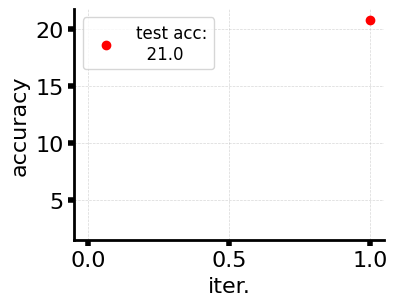

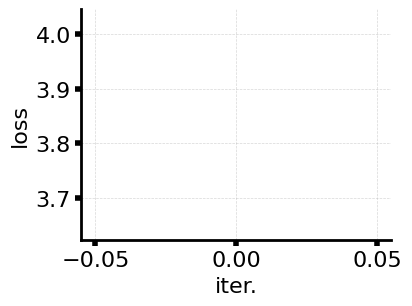

In [3]:
def plot_model_stats(model_results, mean_accs, mean_losses):
    test_acc_mean = np.nanmean(model_results['acc']) * 100

    plt.figure(figsize=(4,3))
    plt.plot(list(mean_accs[0]))
    plt.plot(len(mean_accs[0]), test_acc_mean, 'ro', label=f'test acc:\n  {np.round(test_acc_mean)}')
    plt.ylabel('accuracy')
    plt.xlabel('iter.')
    plt.legend()
    plt.figure(figsize=(4,3))
    plt.plot(list(mean_losses[0]))
    plt.ylabel('loss')
    plt.xlabel('iter.')

plot_model_stats(data, mean_accs, mean_losses)

## Plot d-prime(s)

/var/folders/yc/f5g0c28x47g53ndmf5dwnb1c0000gn/T/ipykernel_53429/2360044035.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Number of categories: {n_categories}', title_fontsize=legendsize, loc='lower right')
/var/folders/yc/f5g0c28x47g53ndmf5dwnb1c0000gn/T/ipykernel_53429/2360044035.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Number of categories: {n_categories}', title_fontsize=legendsize, loc='upper right')
/var/folders/yc/f5g0c28x47g53ndmf5dwnb1c0000gn/T/ipykernel_53429/2360044035.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Number o

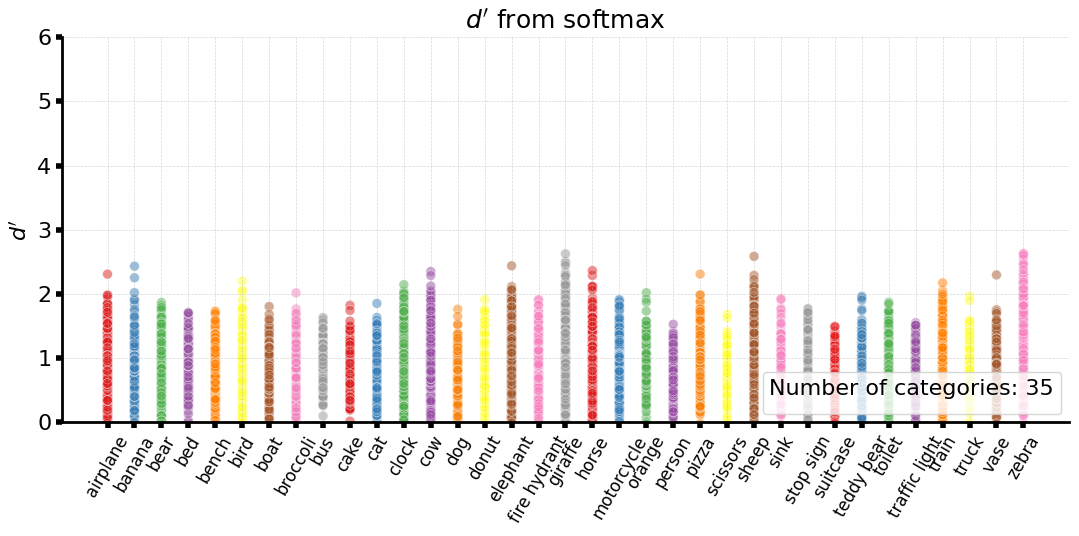

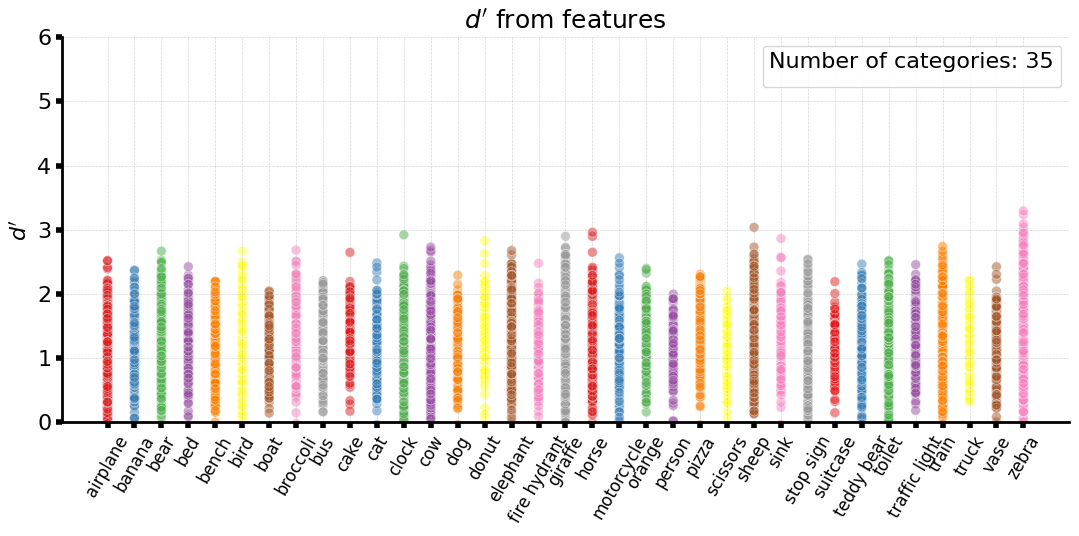

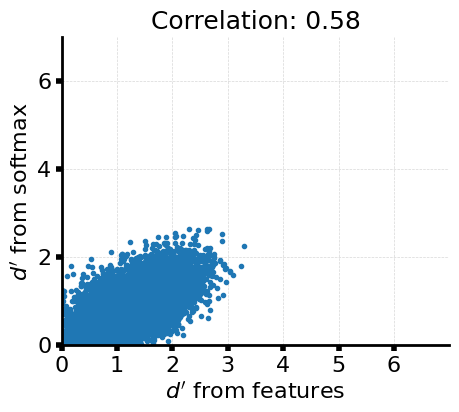

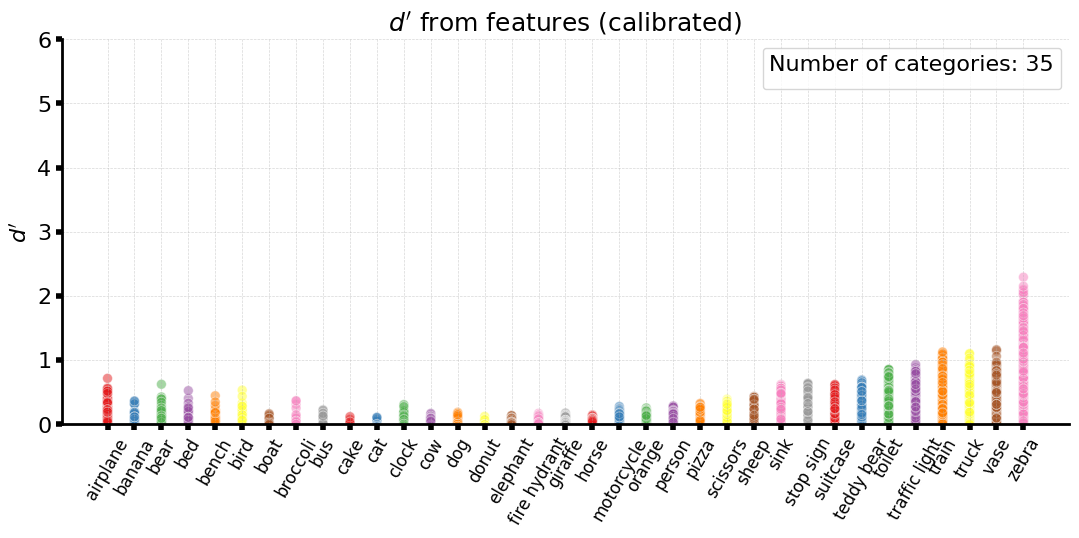

In [13]:
# General settings
xfontsize = 12
legendsize = 16
rotation = 60
figsize_large = (13, 5)
figsize_small = (5, 5)
ylim_default = (0, 6)
ylim_corr = (0, 7)
xlim_corr = (0, 7)

# Number of unique categories
n_categories = len(data['category'].unique())

# Plot d_prime by category
plt.figure(figsize=figsize_large)
sns.scatterplot(data=data, x='category', y='d_prime', hue='category', palette='Set1', s=50, alpha=0.5, legend=None)
plt.xticks(rotation=rotation, fontsize=xfontsize)
plt.ylabel(r"$d'$")
plt.xlabel('')
plt.title(r"$d'$ from softmax")
plt.ylim(ylim_default)
plt.legend(title=f'Number of categories: {n_categories}', title_fontsize=legendsize, loc='lower right')

# Plot d_prime_activations by category
plt.figure(figsize=figsize_large)
sns.scatterplot(data=data, x='category', y='d_prime_activations', hue='category', palette='Set1', s=50, alpha=0.5, legend=None)
plt.xticks(rotation=rotation, fontsize=xfontsize)
plt.ylabel(r"$d'$")
plt.xlabel('')
plt.title(r"$d'$ from features")
plt.ylim(ylim_default)
plt.legend(title=f'Number of categories: {n_categories}', title_fontsize=legendsize, loc='upper right')

# Plot d_prime_activations vs d_prime
plt.figure(figsize=(5, 4))
plt.plot(data['d_prime_activations'], data['d_prime'], '.')
plt.ylim(ylim_corr)
plt.xlim(xlim_corr)
plt.title(f"Correlation: {data['d_prime_activations'].corr(data['d_prime']):.2f}")
plt.xticks(np.arange(0, 7, 1))
plt.ylabel(r"$d'$ from softmax")
plt.xlabel(r"$d'$ from features")

# Plot calibrated d_prime_activations by category
plt.figure(figsize=figsize_large)
sns.scatterplot(data=data, x='category', y='d_prime_activations_cal', hue='category', palette='Set1', s=50, alpha=0.5, legend=None)
plt.xticks(rotation=rotation, fontsize=xfontsize)
plt.ylabel(r"$d'$")
plt.xlabel('')
plt.title(r"$d'$ from features (calibrated)")
plt.ylim(ylim_default)
plt.legend(title=f'Number of categories: {n_categories}', title_fontsize=legendsize, loc='upper right')

